In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = [
    {"_id": {"year": 2025, "month": 4, "day": 2}, "totalRevenue": 38},
    {"_id": {"year": 2025, "month": 4, "day": 4}, "totalRevenue": 136}
]

In [3]:
df = pd.DataFrame(data)

In [4]:
df["date"] = pd.to_datetime(df["_id"].apply(lambda x: f"{x['year']}-{x['month']:02d}-{x['day']:02d}"))

In [5]:
df = df[["date", "totalRevenue"]].rename(columns={"totalRevenue": "revenue"})

In [6]:
df = df.sort_values("date")

In [7]:
print("Formatted Revenue Data:")
display(df)

Formatted Revenue Data:


,date,revenue
0,2025-04-02,38
1,2025-04-04,136


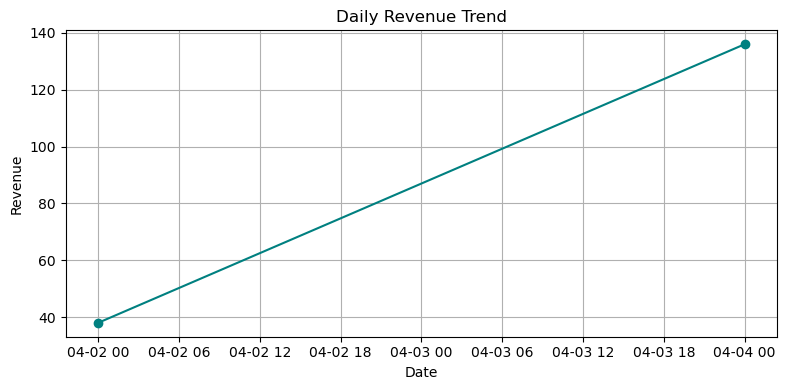

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(df["date"], df["revenue"], marker='o', color='teal')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [11]:
df["date_ordinal"] = df["date"].map(datetime.toordinal)

In [12]:
X = df["date_ordinal"].values.reshape(-1, 1)
y = df["revenue"].values

In [13]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [14]:
df["predicted_revenue"] = model.predict(X)

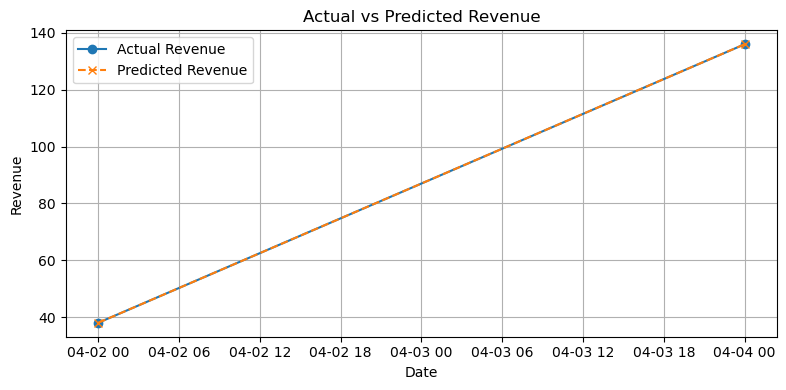

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(df["date"], df["revenue"], label="Actual Revenue", marker='o')
plt.plot(df["date"], df["predicted_revenue"], label="Predicted Revenue", linestyle="--", marker='x')
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

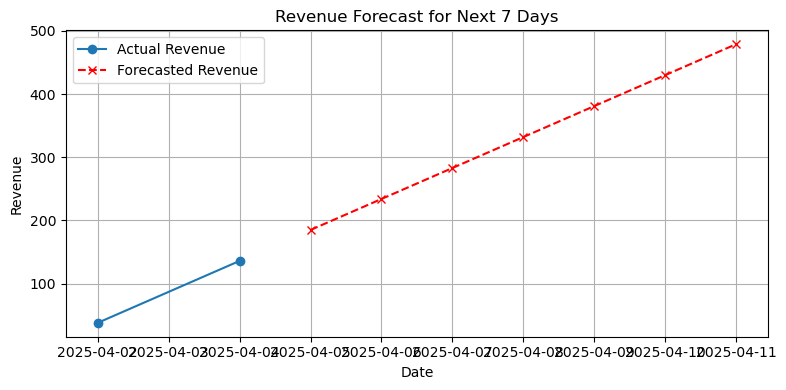

In [16]:
import datetime

# Generate future dates (next 7 days)
future_dates = [df["date"].max() + datetime.timedelta(days=i) for i in range(1, 8)]

# Convert future dates to numerical format
future_X = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

# Predict future revenue
future_predictions = model.predict(future_X)

# Create DataFrame for visualization
future_df = pd.DataFrame({"date": future_dates, "predicted_revenue": future_predictions})

# Plot future revenue predictions
plt.figure(figsize=(8, 4))
plt.plot(df["date"], df["revenue"], label="Actual Revenue", marker="o")
plt.plot(future_df["date"], future_df["predicted_revenue"], label="Forecasted Revenue", linestyle="--", marker="x", color="red")
plt.title("Revenue Forecast for Next 7 Days")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
